# Ensemble methods and Random Forests

### What this session will cover...

- Intuition behind ensemble methods
- Components of the ensemble approach
- Bagging and the random forest

In this learning unit we'll introduce ensemble methods, a machine learning meta-algorithm for improving model performance

## Ensemble model: introduction

A model's output changes based on:
1. hyperparameters: set by you
2. parameters: learned from input data

Training a model with different inputs $\longrightarrow$ different outputs

Can exploit this with **ensemble models** to achieve better performance

The general aim in machine learning is to create a model that, when given some data, outputs some new data.

For a classification model, the output will be a label - True/False, Yes/No, Red/Green/Blue, etc.

For a regression model, the output will be a value - 0.2, 1.32343, etc.

For any fixed input, the output will change based on two main things.

First, the hyperparameters of the model. For example, in a SVM this will be regularisation parameter $C$. 

Second, the parameters learned by the model from the data. This part is the key idea behind ensemble models.

Rather than have one model that performs very well (which is hard to achieve!) we use multiple weaker models together.

Let's look into this in more detail.

## Wisdom of crowds

Guess the weight of the cow?
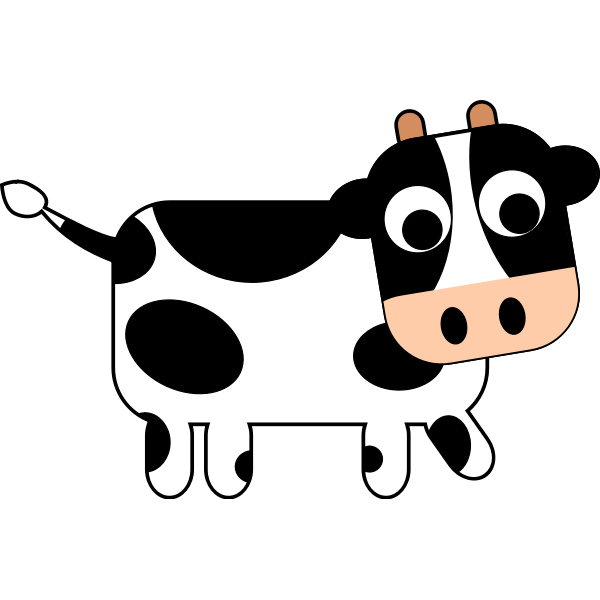

Imagine a competition, where you have to guess the weight of a cow, and the closest guess gets to keep it. 

You are not a cow-weighing expert, and so your guess is unlikely to be correct. However, you should still be able to have a good guess!

Whilst your answer is not correct, you are able to see the guesses of everyone before you. What should you do?

What is the weight of the cow?
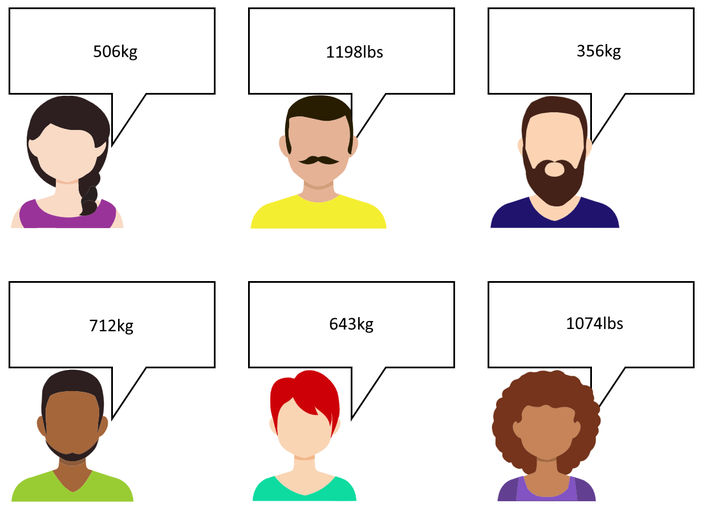

An alternative approach is to ask several people and take the average.

The hope is that, since you don't have access to a single expert on cow weights, the various experiences and knowledge levels of a group of people will converge on the true answer. Some people might work in a farm, or some might just be good at guessing the weights of objects!

**As long as each person is not guessing at random and is instead drawing on some kind of information, the majority vote should give a better idea of the correct answer.**

**This is essentially what ensemble methods do.**

## Components of the ensemble approach


1: A base model

2: A meta-algorithm, to estimate *diverse* instances of the base models on the training data

3: A way to combine the guesses of the base models make a final decision
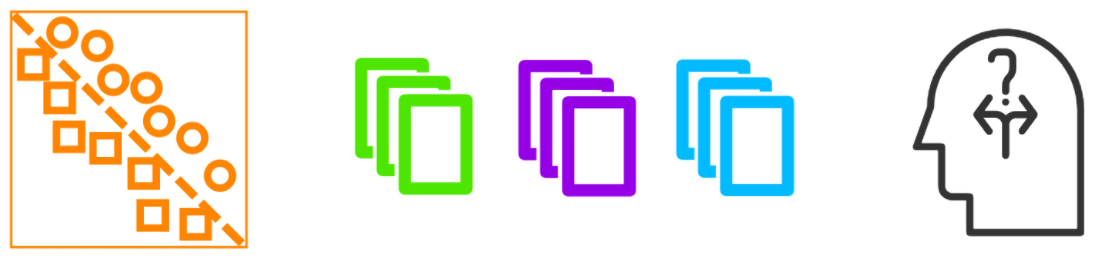

In machine learning, we replace each person in the crowd with a predictive model. 

We want each model to make its prediction in different ways, i.e. to be diverse. 

One way to do this is to train them on different subsets of the data - this is like the people in the crowd all having different experiences and knowledge about the weights of cows.

Once we have all the answers from each model, we then turn them into a single output. For classification, this might be the most commonly predicted class. For regression, it could be the average of the predicted values.

## An example meta-algorithm: Bagging

* Train on different slices of the data
* Get prediction for $\star$ from each model
* Average the result
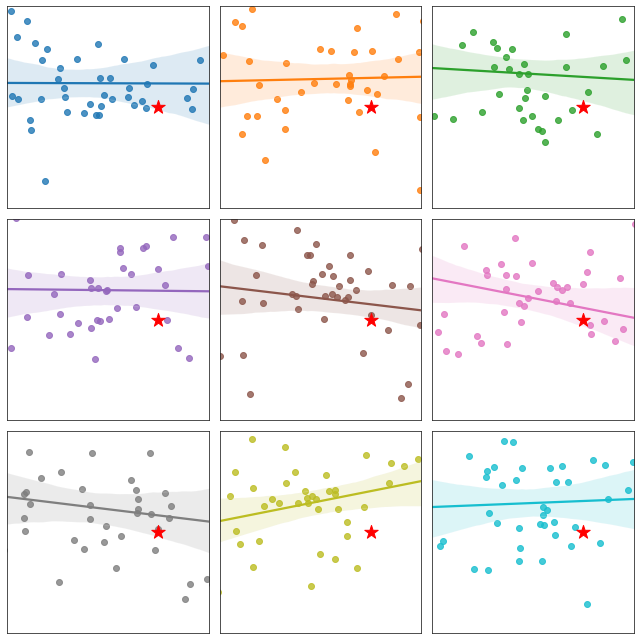

## Why does this work?

* Bias vs Variance
* High bias $\rightarrow$ miss patterns in data
* High variance $\rightarrow$ focus on noise in data
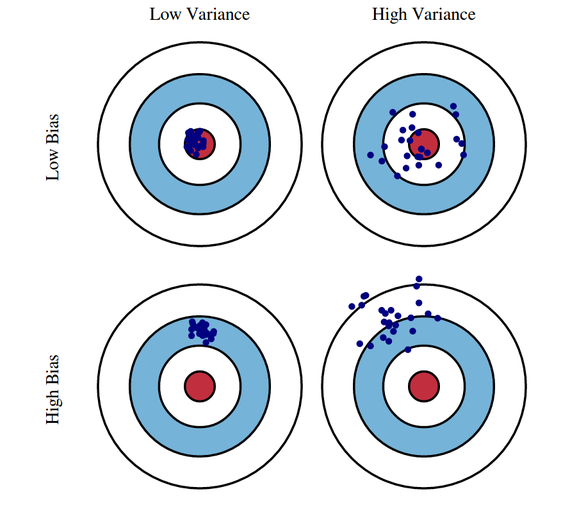

How can many weak models trained on parts of the data outperform one model trained on all of it?

Because having a model that learns all the patterns from the data it sees AND can generalise to unseen data, likely with new but related patterns, is very difficult.

In a bagging approach, each model learns about a different part of the data.

The hope is that the individual models will be good at learning the patterns from that subset, while other models learn the patterns from other subsets.

When you bring them all together, you get the benefit of not being tied to one output - especially useful when dealing with rare outputs.

## Suitable models for bagging

* Bagging estimates multiple weak learners on data 
* Need a base model that is:
    * Simple to estimate
    * Simple to obtain predictions from
    * Has high variance (to ensure diverse weak learners)
* E.g. decision trees!

## Bagging in more detail

The general idea:

*  **b**ootstrap: sample with replacement from dataset $N$ times
* train $N$ models on those samples
* **agg**regate: combine their output

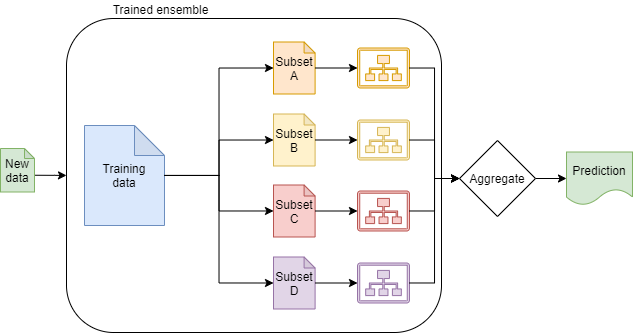

Bagging is an ensemble method. It trains many models on subsets of the dataset, then combines their output.

The combination you do depends on the type of data you have.

For classification, you take the most commonly predicted class (the mode). For regression, you take the mean of the predicted values.

The data subsets are statistically similar to the overall dataset, though it is likely that some rare items will not appear in all subsets.

The idea is that training lots of poor models and then averaging over them will result in slightly better performance.

## Bagging: target models

* The bootstrap aggregated model can join predictions of weak learners
    * Even if each individual model has only slightly better than chance performance, their joint prediction may be strong
* The models can be unstable
    * They may have large variations in their predictions for small changes in data samples, or other factors during training
    * Typical examples: decision trees, nearest neighbours

It's important to know which kind of models ensembles are useful for.

First, it may be a weak learner. That is, its performance may be only slightly better than just randomly guessing. It's similar to "the wisdom of crowds". Imagine a question where any one person has a 51% chance of being right. If you ask one person, you get one answer with a 51% chance of it being right. But if you ask lots of people and take the most common response, you improve your chances.

The model used may be unstable. That is, given a slight change in the data, the output is very different. Logistic regression is stable: a small change in the input probably won't make much difference to the outcome. Decision trees are unstable: a small change can result in a different path taken through the tree and a very different outcome.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data = sklearn.datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)

## Bagging: implementation

In [2]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

ensemble = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=20,
    random_state=0
)
ensemble.fit(X_train, y_train);

c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


We can use, as an example, a `DecisionTreeClassifier` algorithm, and compare it with 20 individual models, each using a different subset of the training data. What the `BaggingClassifier` does is simple: create random training subsets for each model, and fit each normally. Then aggregate the predictions.

## Bagging: performance gains

Single model accuracy: 0.8741258741258742
Average of single models accuracies: 0.9174825174825173
Ensemble model accuracy: 0.9790209790209791


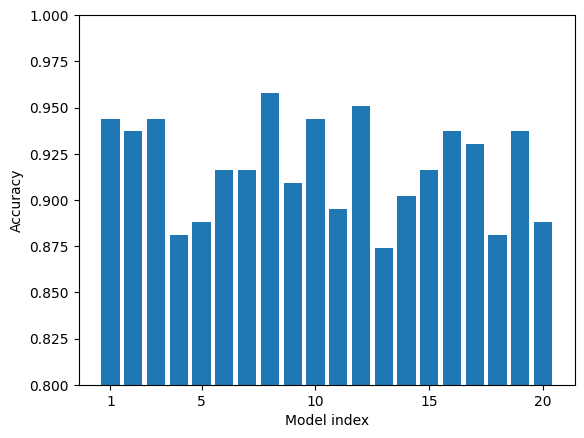

In [3]:
scores = [est.score(X_test, y_test) for est in ensemble.estimators_]

plt.bar(np.arange(len(scores))+1, scores)
plt.xlabel("Model index")
plt.xticks([1,5,10,15,20])
plt.ylabel("Accuracy")
plt.ylim(0.8,1.)

print(f"Single model accuracy: {dtc.score(X_test, y_test)}")

print(f"Average of single models accuracies: {np.mean(scores)}")

print(f"Ensemble model accuracy: {ensemble.score(X_test, y_test)}")

Here we can see the performance of a single decision tree model versus an ensemble of 20. 

The chart of the 20 models in the ensemble shows that the performance varies quite a lot depending on the input subset, demonstrating how brittle this model is for this data and sample size. Individual models with high accuracy were lucky, and selecting them alone would be using an overfit model.

Meanwhile the ensemble model has an accuracy of 0.98, which is much higher than the average the performance of individual models, 0.92.

## Bagging: data

* Bagging will generate stronger performance on data points seen often
* Rare items appear in fewer samples
    * Implicitly ignores outliers

One thing to consider is that if you have unbalanced data, then bootstrapping could result in some models being trained on subsets that do not contain any examples of the less common class.

This can be good, if you only really care about the most common class. It's also one way to ignore outliers in the data.

## Bagging: data

* Bagging will generate stronger performance on data points seen often
* Rare items appear in fewer samples
    * Implicitly ignores outliers
* Can oversample/undersample
    * Give more prominence to rarer items

But if you don't want this, then you can oversample (duplicate the rare items so that they appear in more subsets) or undersample (drop common items so they appear less often overall)

## Random Forest: ensemble of decision trees

* Bagging is most commonly used with decision trees, and is called Random Forest
* Decisions trees are prone to overfitting and are unstable
* Features are different for different data subsets
* Easy to build diverse decision trees:
    * Subsamples the data AND the features

Decision trees are a good choice for ensembles, as they can overfit to the training data very easily, and are unstable. Using lots of decision trees in an ensemble is called a random forest.

By training trees on subsets of features, we can learn which features are the most important. This helps avoid overfitting - you don't want all the trees in the forest using the exact same very strong feature to make their decision. This could harm generalisation ability on unseen data.

### Brittleness of decision trees

* We can visualize two individual decision trees, training on the same task, with different subsets of the data.
* The split feature is already different from the starting node.

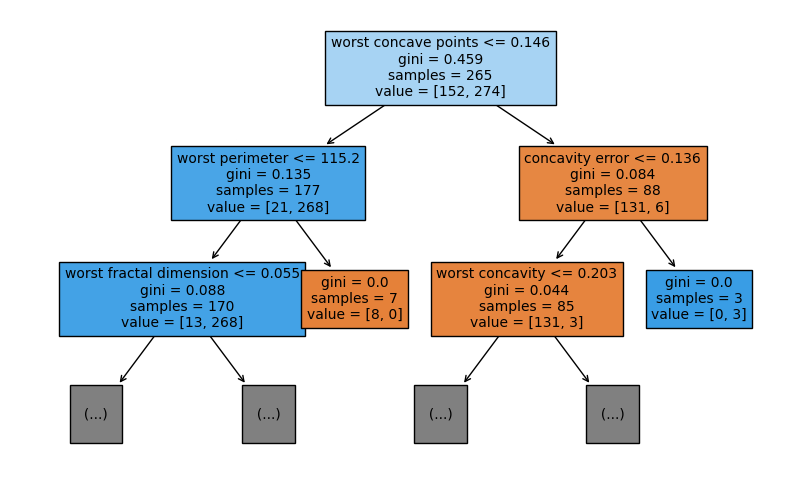

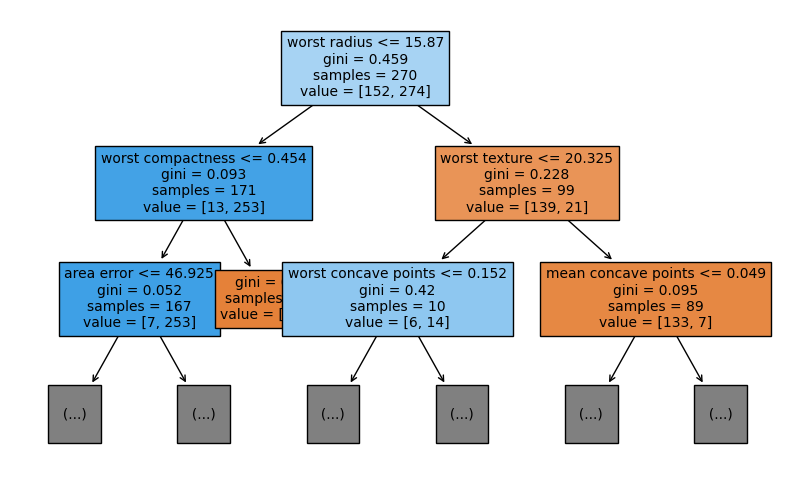

In [4]:
from sklearn import tree

plt.figure(figsize=(10,6))

dtc = ensemble.estimators_[0]

tree.plot_tree(dtc, filled=True, fontsize=10, feature_names=data.feature_names, max_depth = 2);

plt.figure(figsize=(10,6))

dtc = ensemble.estimators_[1]

tree.plot_tree(dtc, filled=True, fontsize=10, feature_names=data.feature_names, max_depth = 2);

## Random Forest - forest settings

Adding trees: reduces variance
* But no effect after a point

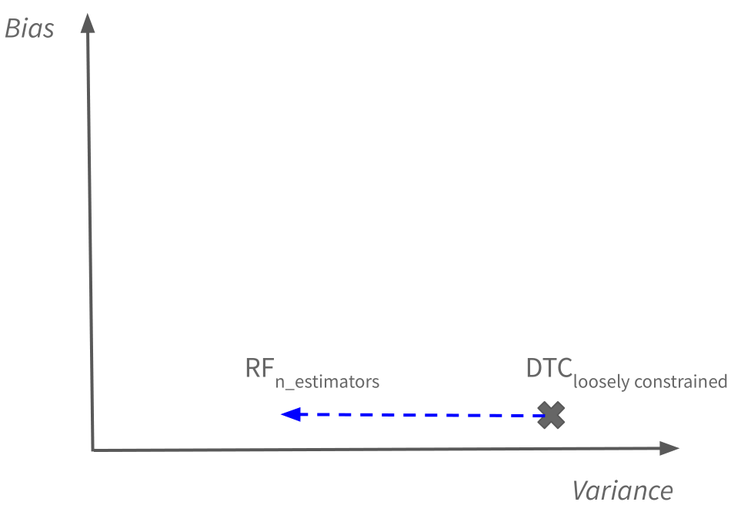

For a random forest, the main hyperparameter is how many trees to use. The more you use, the less variance your model has, which will improve performance on the training data, up to a point.

You do want to retain some variance though, for generalisability to a test set.

### Number of trees in the forest

* Diminishing return on the number of individual models
* Trade-off with computational cost of training multiple models (linear with number of models)
* A typical range for the number of trees is 20-100

c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\CKitc\OneDrive\Desktop\Intro to Ensembles\.venv\lib\site-packages\sklearn\ensemble\_base.py

Text(0, 0.5, 'Accuracy of ensemble')

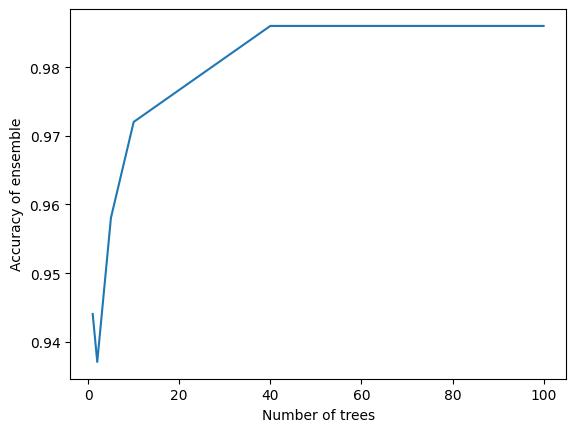

In [5]:
n_trees = [1,2,5,10,40,100]
scores = []

for nt in n_trees:
    ensemble = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=nt, random_state=0)
    ensemble.fit(X_train, y_train)
    scores += [ensemble.score(X_test, y_test)]
                      
plt.plot(n_trees, scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of ensemble")

## Random Forest - tree settings

Can control specific tree properties:
* Maximum depth
* Number of leaf nodes
* Other decision tree properties

In addition to that forest-level hyperparameter, there are all the usual tree-level hyperparameters.

These are set to be the same for *all* trees in the forest.

## Random Forest - Pros

${\color{blue}+}$ Good performance for many kinds of data

${\color{blue}+}$ Generalises well even for small datasets

${\color{blue}+}$ Fast to train

${\color{blue}+}$ Feature importance

Random forests are very fast to train, as they are easily paralellised behind the scenes - all the trees can be run simultaneously as they are not dependent on each other.

Feature importance can also be determined. During training, some of the training data can be held aside ("out of bag" - OOB) and used to assess the performance of the tree, as follows:

In every tree, evaluate it using the OOB items and count how many it gets right. Then, randomly shuffle the values for a particular feature in the OOB items and repeat. Subtract the number of correct items this time from the first time, which gives an indication of how important that feature is. That is, if randomly shuffling a feature hurts performance then that feature is likely to be important for determining the class.

## Random Forest - Cons

${\color{red}-}$ Difficult to interpret

${\color{red}-}$ Limited by simplicity of decision trees (no compositionality of features)

One of the strengths of a single decision tree is that, by tracing the path you took through a tree to reach a decision, you can see exactly how the decision was reached.

When you have potentially hundreds of trees, this becomes much more difficult to do. Each tree was trained on different data and possibly different features too, so aggregating over the paths through them in some way isn't going to be very informative.

There is therefore a trade-off between better performance and explainability.

### Wild success of Random Forests

* Random forests and variations (e.g. boosting models) are one of the most robust and effective prediction models.
* Random forest works out-of-the-box on many kinds of datasets, usually with small to medium dimensionality.
* Very strong performance model on benchmarks over many datasets. Used broadly in industry and Kaggle competitions ([Benchmark paper](http://lowrank.net/nikos/pubs/empirical.pdf "Benchmark paper")).
* Not as good as neural networks in very high-dimensional compositional data, such as images.


Further reading: https://medium.com/rants-on-machine-learning/the-unreasonable-effectiveness-of-random-forests-f33c3ce28883

Benchmark paper: http://lowrank.net/nikos/pubs/empirical.pdf

## Conclusion

* Ensemble methods can improve performance for unstable models
* Less explainable results

## Jupyter Exercise

Random Forest

Open `random-forest-practical.ipynb`